<a href="https://colab.research.google.com/github/Miftakhull/UAS_VK_MIFTA_tx/blob/main/texture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern

In [21]:
def load_image(arr):
    strr = "Dataset/*.jpg"
    for file in glob.glob(strr):
        img=np.asarray(plt.imread(file))
        arr.append(img)
    return arr

In [22]:
def preprocessing(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(img)
    return arr_prep

In [23]:
def extractLBP(img):
    lbp = local_binary_pattern(img, 24,3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 27),range=(0, 26))
    hist = hist.astype("float")
    hist /= (hist.sum() + (1e-7))
    return lbp,hist

In [24]:
def featureExtraction(arr):
    arr_feature=[]
    vector_feature=[]
    for i in range(np.shape(arr)[0]):
        lb,vektor = extractLBP(arr[i])
        arr_feature.append(lb)
        vector_feature.append(vektor)
    return arr_feature, vector_feature

In [25]:
data=[]
data=load_image(data)

In [26]:
dataPreprocessed = preprocessing(data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [27]:
dataExtracted,vector = featureExtraction(dataPreprocessed)

Extraction Result


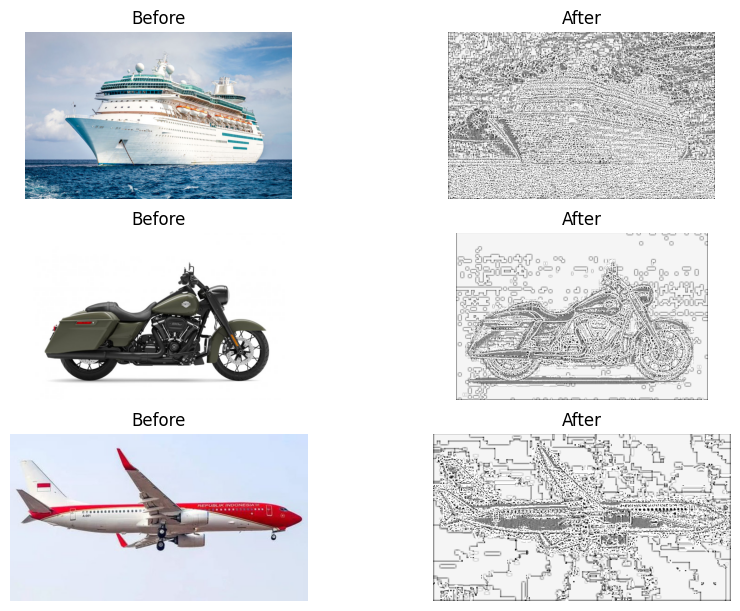

In [28]:
print('Extraction Result')
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('Before')
ax1.set_axis_off()
ax1.imshow(data[0])

ax2 = fig.add_subplot(4,2,2)
ax2.set_title('After')
ax2.set_axis_off()
ax2.imshow(dataExtracted[0],cmap=plt.cm.gray)

ax3 = fig.add_subplot(4,2,3)
ax3.set_title('Before')
ax3.set_axis_off()
ax3.imshow(data[1],)

ax4 = fig.add_subplot(4,2,4)
ax4.set_title('After')
ax4.set_axis_off()
ax4.imshow(dataExtracted[1],cmap=plt.cm.gray)

ax5 = fig.add_subplot(4,2,5)
ax5.set_title('Before')
ax5.set_axis_off()
ax5.imshow(data[2])

ax6 = fig.add_subplot(4,2,6)
ax6.set_title('After')
ax6.set_axis_off()
ax6.imshow(dataExtracted[2],cmap=plt.cm.gray)
plt.show()

In [29]:
print("Vector of Image 1 :",vector[0])
print()
print("Vector of Image 2 :",vector[1])
print()
print("Vector of Image 3 :",vector[2])

Vector of Image 1 : [0.03840051 0.02887763 0.01481359 0.00988826 0.00757278 0.00704872
 0.00626994 0.00912618 0.01195944 0.01492008 0.01714368 0.02593788
 0.03038927 0.04112312 0.02008343 0.03119937 0.01657995 0.02990279
 0.01682006 0.01682423 0.01736291 0.01930674 0.02354724 0.0277105
 0.11242671 0.40476499]

Vector of Image 2 : [0.01133208 0.01051126 0.00543621 0.00370544 0.00270872 0.00251407
 0.00253752 0.00385553 0.00492964 0.00710366 0.00806989 0.01742495
 0.03806285 0.05303002 0.00868433 0.02842402 0.00839587 0.03364212
 0.01085131 0.00990619 0.00876173 0.0116651  0.01270638 0.01385553
 0.5118621  0.17002345]

Vector of Image 3 : [0.01508681 0.01211372 0.00638021 0.0053559  0.00322917 0.00302517
 0.00282986 0.00503906 0.00671441 0.00882378 0.00864583 0.01493056
 0.02641927 0.04577691 0.01003038 0.03243056 0.00971354 0.03630208
 0.01155382 0.01167101 0.01177517 0.01568142 0.01957031 0.01430556
 0.4728776  0.18971788]
